In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

##EDA

In [4]:
features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
    ]

X = df[features].fillna(0)

In [5]:
import matplotlib.pyplot as plt

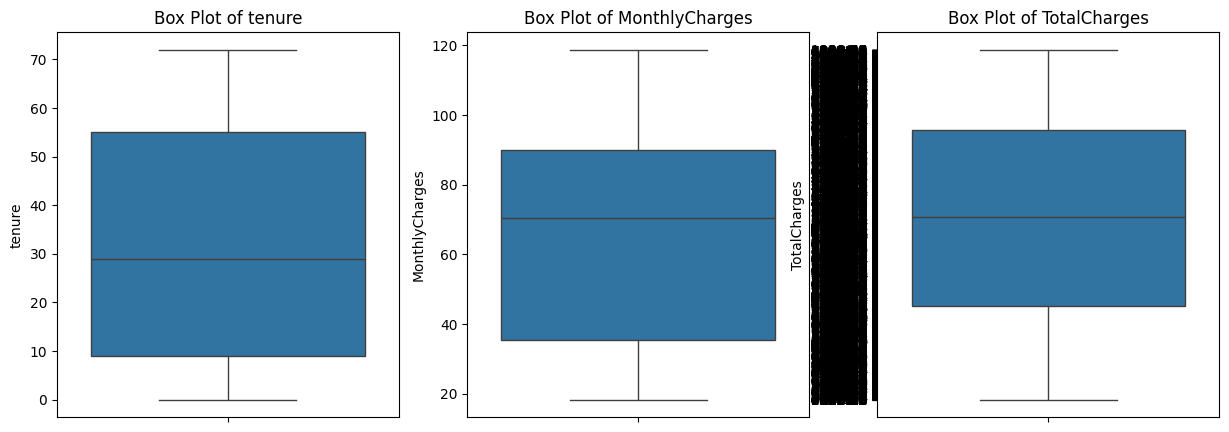

In [6]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(data=X[feature])
    plt.title(f'Box Plot of {feature}')

In [7]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [8]:
feature = pd.Series(features)
feature.isnull().sum()

0

In [9]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')


In [10]:
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].median())

In [11]:
for col in ['tenure', 'MonthlyCharges']:
    X[col] = pd.to_numeric(X[col], errors='coerce')

##Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [16]:
import matplotlib.pyplot as plt

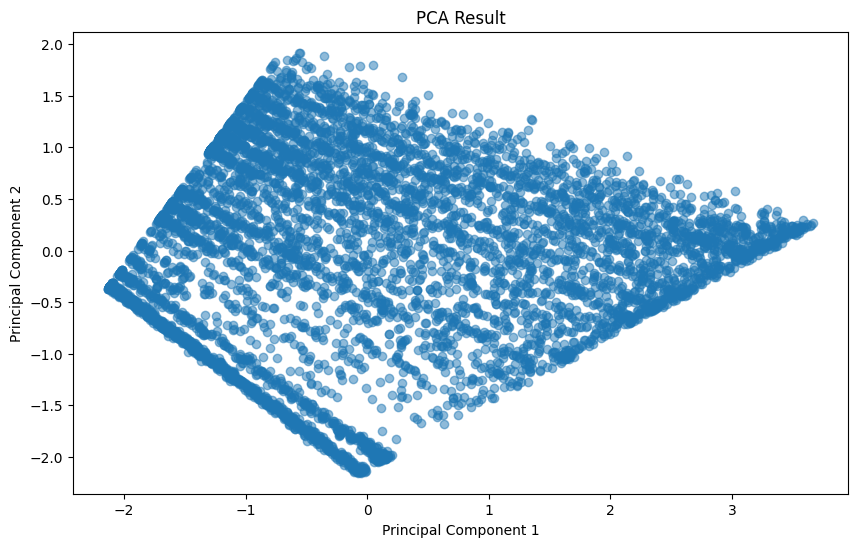

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

In [25]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
clusters = dbscan.fit_predict(X_pca)

In [26]:
df['Cluster'] = clusters


In [29]:
churners = df[(df['Cluster'] == -1) & (df['Churn'] == 'Yes')]

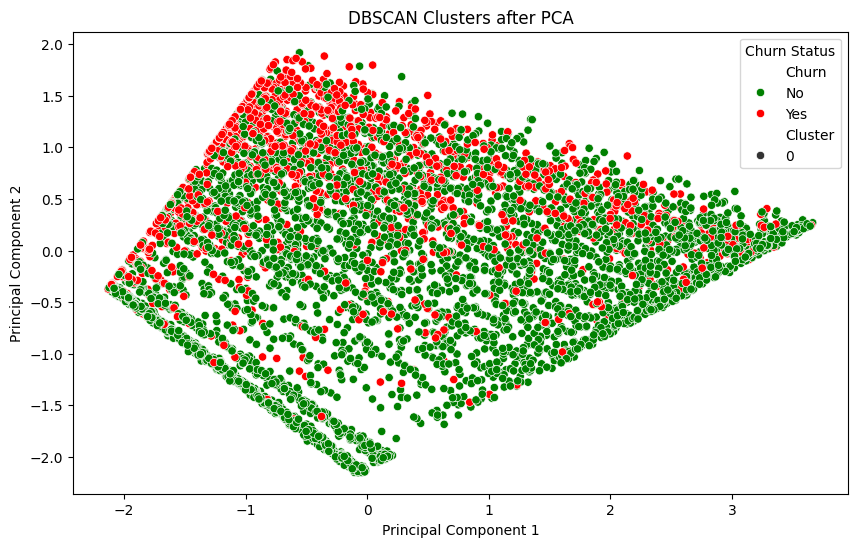

In [28]:
plt.figure(figsize=(10, 6))
plt.title('DBSCAN Clusters after PCA')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Churn'], style=df['Cluster'], palette={'Yes': 'red', 'No': 'green'})
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Churn Status')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Try different values for eps and min_samples
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        # Create and fit the DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_pca)

        # Check if there are at least 2 clusters (excluding noise -1)
        unique_labels = set(clusters)
        if len(unique_labels) > 1 and any(label != -1 for label in unique_labels):
            # Calculate silhouette score if there are multiple clusters
            silhouette_avg = silhouette_score(X_scaled, clusters, metric="euclidean")
            print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {silhouette_avg}")
        else:
            print(f"eps: {eps}, min_samples: {min_samples}, Only one cluster or all noise. Skipping silhouette score.")

eps: 0.3, min_samples: 3, Only one cluster or all noise. Skipping silhouette score.
eps: 0.3, min_samples: 5, Only one cluster or all noise. Skipping silhouette score.
eps: 0.3, min_samples: 7, Only one cluster or all noise. Skipping silhouette score.
eps: 0.3, min_samples: 10, Only one cluster or all noise. Skipping silhouette score.
eps: 0.5, min_samples: 3, Only one cluster or all noise. Skipping silhouette score.
eps: 0.5, min_samples: 5, Only one cluster or all noise. Skipping silhouette score.
eps: 0.5, min_samples: 7, Only one cluster or all noise. Skipping silhouette score.
eps: 0.5, min_samples: 10, Only one cluster or all noise. Skipping silhouette score.
eps: 0.7, min_samples: 3, Only one cluster or all noise. Skipping silhouette score.
eps: 0.7, min_samples: 5, Only one cluster or all noise. Skipping silhouette score.
eps: 0.7, min_samples: 7, Only one cluster or all noise. Skipping silhouette score.
eps: 0.7, min_samples: 10, Only one cluster or all noise. Skipping silhoue